### Zulema Perez

### CPSC 483

### Project 4: Real-World Data; Covariance, Correlation, and Confidence Intervals

### Experiment 1

Load and examine the California dataset’s features, target values, and description.

In [1]:
%reset -f
%matplotlib inline

from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

cal_housing = fetch_california_housing()
print(cal_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [2]:
features = pd.DataFrame(data = cal_housing.data, columns = cal_housing.feature_names)

ave_bedrms_feature = features[['AveBedrms']]
print(ave_bedrms_feature.shape)
ave_bedrms_feature


(20640, 1)


,AveBedrms
0,1.023810
1,0.971880
2,1.073446
3,1.073059
4,1.081081
...,...
20635,1.133333
20636,1.315789
20637,1.120092
20638,1.171920


In [3]:
target = pd.DataFrame( data = cal_housing.target, columns = ['MedHouseVal'])

print(target.shape)
target

(20640, 1)


,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


### Experiment 2

Create and fit() an
sklearn.linear_model.LinearRegression model using AveBedrms as a predictor of
MedHouseVal. 

In [4]:
x = ave_bedrms_feature
y = target
lin_model = LinearRegression().fit(x, y)

lin_model.score(x, y)

0.0021809379116133343

***How well does the model score()?***

The score of the model with AveBedrms as a predictor of MedHouseVal is approximately 0.0022, which means less than one percent of the data points fall within the regression line.


### Experiment 3

Let’s take a closer look at the data. Seaborn’s pairplot() function can be used to plot
pairs of features against each other. Plot MedHouseVal as a function of each of the
features.

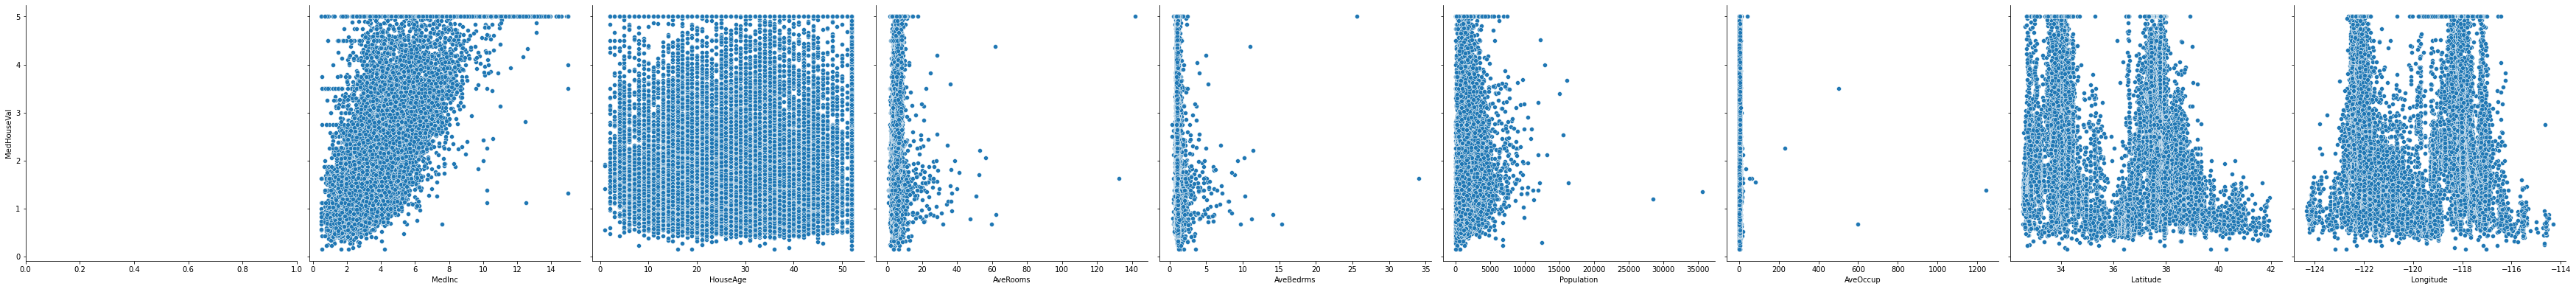

In [5]:
all_cal_house_data = pd.DataFrame(data = cal_housing.data, columns = cal_housing.feature_names)
all_cal_house_data['MedHouseVal'] = target

#features.head()

### Added empty string to push 'MedInc' to index [1]
### pairplot() was not populating 'MedInc' scatter plot 
### otherwise when 'MedInc' was at index[0]

sns.pairplot(all_cal_house_data, x_vars = ['','MedInc','HouseAge', 'AveRooms','AveBedrms', 'Population','AveOccup','Latitude', 'Longitude'], y_vars = ['MedHouseVal'], height = 5.5);

### Experiment 4

Because of the size of the dataset, graphs produced by Seaborn are rather crowded. Try
the plot again using a sample() of 1%.

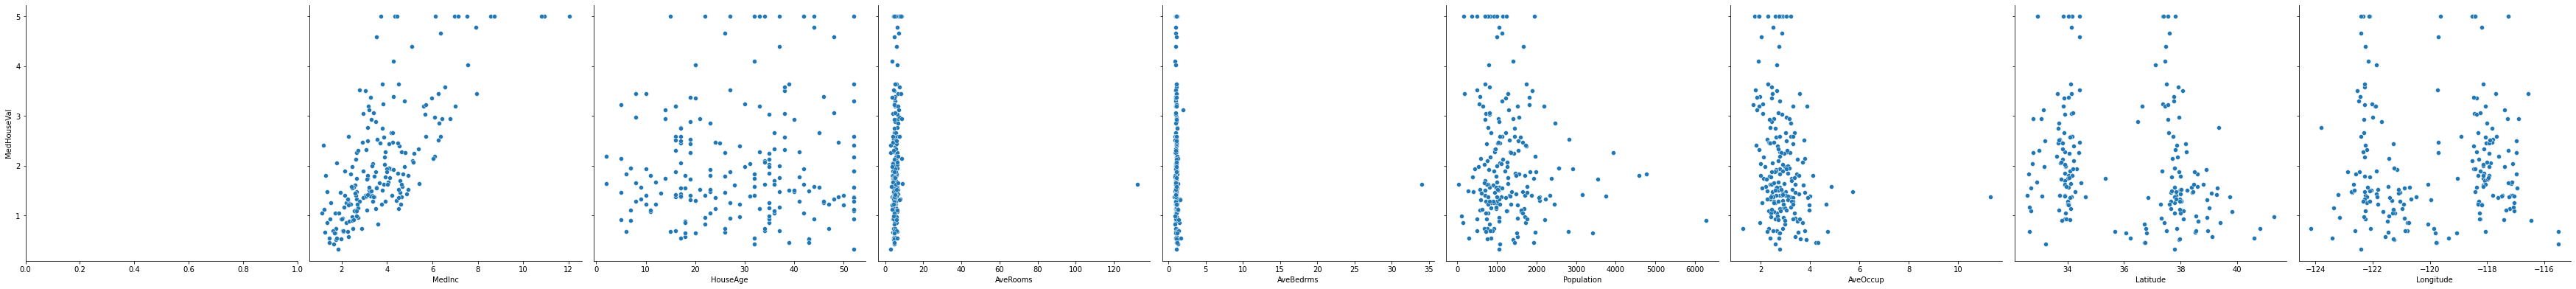

In [6]:
### Added empty string to push 'MedInc' to index [1]
### pairplot() was not populating 'MedInc' scatter plot 
### otherwise when 'MedInc' was at index[0]

one_percent_all_data = all_cal_house_data.sample(frac = 0.01, replace = True, random_state = 1)
sns.pairplot(one_percent_all_data, x_vars = ['','MedInc','HouseAge', 'AveRooms','AveBedrms', 'Population','AveOccup','Latitude', 'Longitude'], y_vars = ['MedHouseVal'], height = 5.5);

***How does the distribution of AveBedrms seem to affect MedHouseVal?***

The distribution of AveBedrms does not seem to affect MedHouseVal. AveBedrms appears to be constant at all values of MedHouseVal. There is no appartent relationship between AveBedrms and MedHouseVal.


### Experiment 5

***Which features seem to have a linear relationship with MedHouseVal?***

The feature MedInc (median income in block) seems to have a linear relationship with MedHouseVal (median house value for California districts).

### Experiment 6

***What interesting relationship do you see between MedHouseVal and the Latitude and
Longitude?***

Based on the scatterplot shown below the MedHouseVal is highest near large metropolitan areas, like San Fransisco and Los Angeles, that are also ocean adjacent.
The closer to the ocean the house is the MedHouseVal is higher and the farther inland the house is MedHouseVal is lower.

<Figure size 432x288 with 0 Axes>

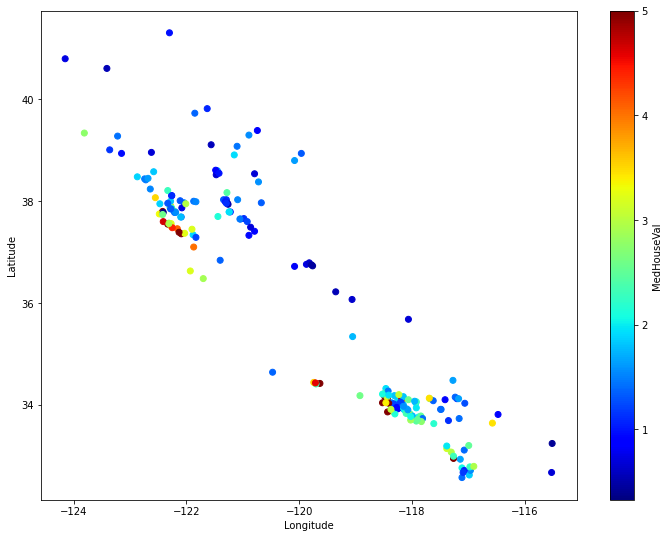

In [7]:
plt.clf()
plt.figure(figsize = (12, 9))
plt.scatter( x = 'Longitude', y = 'Latitude', c = one_percent_all_data['MedHouseVal'], data = one_percent_all_data, cmap = plt.get_cmap('jet') )
plt.xlabel('Longitude')
plt.ylabel('Latitude')
cbar = plt.colorbar()
cbar.set_label('MedHouseVal')
plt.show()

### Experiment 7

Recall that the covariance matrix shows how pairs of features in a dataset co-vary. 


In [8]:
one_percent_all_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,3.731764,28.878641,5.926332,1.229215,1295.004854,2.890062,35.943786,-119.862524,2.032719
std,1.803063,13.620280,8.936725,2.302603,815.660119,0.856042,2.215986,2.102108,1.160821
min,1.132600,2.000000,2.654450,0.816327,36.000000,1.280603,32.570000,-124.150000,0.325000
25%,2.498450,17.000000,4.564552,1.004315,789.750000,2.446948,33.932500,-122.025000,1.257750
50%,3.384250,30.000000,5.069935,1.051158,1068.000000,2.770219,36.145000,-119.750000,1.723500
75%,4.514625,38.750000,5.981160,1.099895,1588.000000,3.206595,37.877500,-118.062500,2.560250
max,12.037200,52.000000,132.533333,34.066667,6274.000000,11.295918,41.310000,-115.510000,5.000010


In [9]:
one_percent_all_data.cov()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,3.251038,-3.149304,1.885410,0.098456,-62.214025,-0.037708,-0.834085,0.430775,1.528442
HouseAge,-3.149304,185.512029,-2.569313,0.435834,-4172.326237,0.290847,3.333974,-6.738503,1.057666
AveRooms,1.885410,-2.569313,79.865051,20.422186,-796.008093,-0.282502,1.784403,0.016622,0.196180
AveBedrms,0.098456,0.435834,20.422186,5.301980,-201.602398,-0.099292,0.492642,-0.034677,-0.089030
Population,-62.214025,-4172.326237,-796.008093,-201.602398,665301.429245,109.948981,-392.544799,427.079427,-110.275681
AveOccup,-0.037708,0.290847,-0.282502,-0.099292,109.948981,0.732807,-0.028167,0.161106,-0.230339
Latitude,-0.834085,3.333974,1.784403,0.492642,-392.544799,-0.028167,4.910593,-4.336692,-0.582362
Longitude,0.430775,-6.738503,0.016622,-0.034677,427.079427,0.161106,-4.336692,4.418860,0.111973
MedHouseVal,1.528442,1.057666,0.196180,-0.089030,-110.275681,-0.230339,-0.582362,0.111973,1.347505


***What patterns (if any) do you observe?*** 

Based on the covariance matrix above, the features MedInc, HouseAge, AveRooms, and Longitude have positive values which indicate an increasing linear relationship between each value and MedHouseVal. The features AveBedrms, Population, AveOccup, Latitude have negative values which indicate a decreasing linear relationship between each value and MedHouseVal.

### Experiment 8

Covariance is difficult to interpret because the features are on very different scales.
While you could standardize the features yourself, the correlation matrix is the
covariance matrix of the standardized variables . 

In [10]:
one_percent_all_data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.128238,0.117008,0.023714,-0.042303,-0.024430,-0.208753,0.113654,0.730252
HouseAge,-0.128238,1.000000,-0.021108,0.013897,-0.375563,0.024945,0.110461,-0.235354,0.066896
AveRooms,0.117008,-0.021108,1.000000,0.992441,-0.109202,-0.036927,0.090105,0.000885,0.018911
AveBedrms,0.023714,0.013897,0.992441,1.000000,-0.107341,-0.050373,0.096549,-0.007164,-0.033308
Population,-0.042303,-0.375563,-0.109202,-0.107341,1.000000,0.157466,-0.217177,0.249083,-0.116468
AveOccup,-0.024430,0.024945,-0.036927,-0.050373,0.157466,1.000000,-0.014848,0.089529,-0.231797
Latitude,-0.208753,0.110461,0.090105,0.096549,-0.217177,-0.014848,1.000000,-0.930972,-0.226392
Longitude,0.113654,-0.235354,0.000885,-0.007164,0.249083,0.089529,-0.930972,1.000000,0.045887
MedHouseVal,0.730252,0.066896,0.018911,-0.033308,-0.116468,-0.231797,-0.226392,0.045887,1.000000


***Based on the correlation matrix, which feature is the best predictor of MedHouseVal?***

Based on the correlation matrix above, the feature that is the best predictor of MedHouseVal is MedInc.

### Experiment 9

Repeat experiment (2) using the feature you found in experiment (8) instead of
AveBedrms. 

In [11]:
med_inc_feature = features[['MedInc']]

x_ = med_inc_feature
y_ = target

linear_model = LinearRegression().fit(x_, y_)

linear_model.score(x_, y_)

0.47344749180719903

***How well does this model score?***

The score of the model with MedInc as a predictor of MedHouseVal is approximately 0.474, which means 47.4 percent of the data points fall within the regression line.

### Experiment 10

Another way to visualize the predictive value of the two features is to compare the
variance. The seaborn.regplot() function can be used to create a scatter plot, add a
regression line, and plot a 95% confidence interval in a single step. (Recall that 95%
corresponds to ±2 𝜎.)

Plot AveBedrms as a predictor of MedHouseVal, then use the feature you found in
experiment (8).

<AxesSubplot:xlabel='AveBedrms', ylabel='MedHouseVal'>

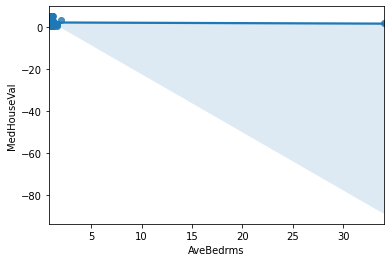

In [12]:
from seaborn import regplot

regplot(data=one_percent_all_data, x='AveBedrms', y='MedHouseVal')

<AxesSubplot:xlabel='MedInc', ylabel='MedHouseVal'>

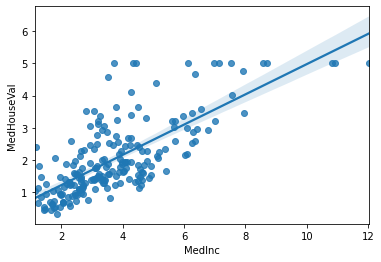

In [13]:
regplot(data=one_percent_all_data, x='MedInc', y='MedHouseVal')

***What difference do you see? (Don’t forget to use the sample you created in experiment (4) , or your graph will be difficult to interpret.)***

The main difference between the two graphs is that the data points for the AveBedrms seem to be mostly clustered in one location with outliers that appear to affect the regression line, while the data points for MedInc follow a more correlated linear pattern.

### Experiment 11

Other than the feature you found in experiment (8) , there is only a very weak relationship
between MedHouseVal and the other features. Fit and score a model to predict
MedHouseVal using all the features.

In [14]:
regression = LinearRegression().fit(features, target)

r2_score = regression.score(features, target)
print("R2 score is:")
print(r2_score)

R2 score is:
0.606232685199805


***Are you surprised by the result?***

Yes, I was surprised by the results being that most of the features did not correlate well with the target value at first glance. What's more surprising is that it shows a stronger correlation than what was determined when using MedInc alone.

***What accounts for the difference from experiment (9) ?***

Perhaps the difference can be explained by all features playing an important role in determining the value of a house. For example, the sacrifice of one feature could be compensated by the addition of another feature, thus resulting in a house of equal value.